In [59]:
import yt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [13]:
# Download data
cell_fields = [
    "Density",
    "x-velocity",
    "y-velocity",
    "z-velocity",
    "Pressure",
    "Metallicity",
    # "dark_matter_density",
    "xHI",
    "xHII",
    "xHeII",
    "xHeIII",
]
epf = [
    ("particle_family", "b"),
    ("particle_tag", "b"),
    ("particle_birth_epoch", "d"),
    ("particle_metallicity", "d"),
]

f1 = "/Users/srnpt.p/Desktop/ASTR498/output_00273"
f2 = "output_00274/info_00274.txt"

ds = yt.load(f1, fields = cell_fields, extra_particle_fields = epf)
ad = ds.all_data()

yt : [INFO     ] 2024-10-01 20:05:07,399 Parameters: current_time              = 4.311420483661945
yt : [INFO     ] 2024-10-01 20:05:07,400 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2024-10-01 20:05:07,400 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-01 20:05:07,400 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-10-01 20:05:07,400 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-10-01 20:05:07,401 Parameters: current_redshift          = 12.171087046255657
yt : [INFO     ] 2024-10-01 20:05:07,401 Parameters: omega_lambda              = 0.685000002384186
yt : [INFO     ] 2024-10-01 20:05:07,401 Parameters: omega_matter              = 0.314999997615814
yt : [INFO     ] 2024-10-01 20:05:07,401 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-10-01 20:05:07,401 Parameters: hubble_constant           = 0.674000015258789
yt : [WARNING  ] 2024-10-01 20:05:11,940 This output has no 

In [29]:
# Finding center of the data
x_pos = np.array(ad["star", "particle_position_x"])
y_pos = np.array(ad["star", "particle_position_y"])
z_pos = np.array(ad["star", "particle_position_z"])
x_center = np.mean(x_pos)
y_center = np.mean(y_pos)
z_center = np.mean(z_pos)
x_pos = x_pos - x_center
y_pos = y_pos - y_center
z_pos = z_pos - z_center
ctr_at_code = np.array([x_center, y_center, z_center])

In [25]:
# Adjusting width variable of the plot
pw = 400  # plot width on one side in pc
r_sf = 500  # radii for sf in pc
gas_res = 1000  # resolution of the fixed resolution buffer

plt_wdth = pw

In [6]:
# Showing the field of ds
print(dir(ds.fields))

['DM', 'cloud', 'cloud_tracer', 'deposit', 'dust', 'dust_tracer', 'gas', 'gas_tracer', 'gravity', 'index', 'io', 'nbody', 'ramses', 'ramses-rt', 'rt', 'sink', 'sink_csv', 'star', 'star_tracer']


In [8]:
# Showing star directory
print(dir(ds.fields.star))

['mesh_id', 'particle_angular_momentum', 'particle_angular_momentum_magnitude', 'particle_angular_momentum_x', 'particle_angular_momentum_y', 'particle_angular_momentum_z', 'particle_birth_epoch', 'particle_family', 'particle_identity', 'particle_index', 'particle_mass', 'particle_metallicity', 'particle_ones', 'particle_position', 'particle_position_cylindrical_radius', 'particle_position_cylindrical_theta', 'particle_position_cylindrical_z', 'particle_position_relative_x', 'particle_position_relative_y', 'particle_position_relative_z', 'particle_position_spherical_phi', 'particle_position_spherical_radius', 'particle_position_spherical_theta', 'particle_position_x', 'particle_position_y', 'particle_position_z', 'particle_radial_velocity', 'particle_radius', 'particle_refinement_level', 'particle_specific_angular_momentum', 'particle_specific_angular_momentum_x', 'particle_specific_angular_momentum_y', 'particle_specific_angular_momentum_z', 'particle_tag', 'particle_velocity', 'parti

yt : [INFO     ] 2024-10-01 20:17:20,865 Projection completed
yt : [INFO     ] 2024-10-01 20:17:20,866 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:17:20,866 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:17:20,867 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:17:20,867 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:17:20,868 Making a fixed resolution buffer of (('ramses', 'xHII')) 800 by 800



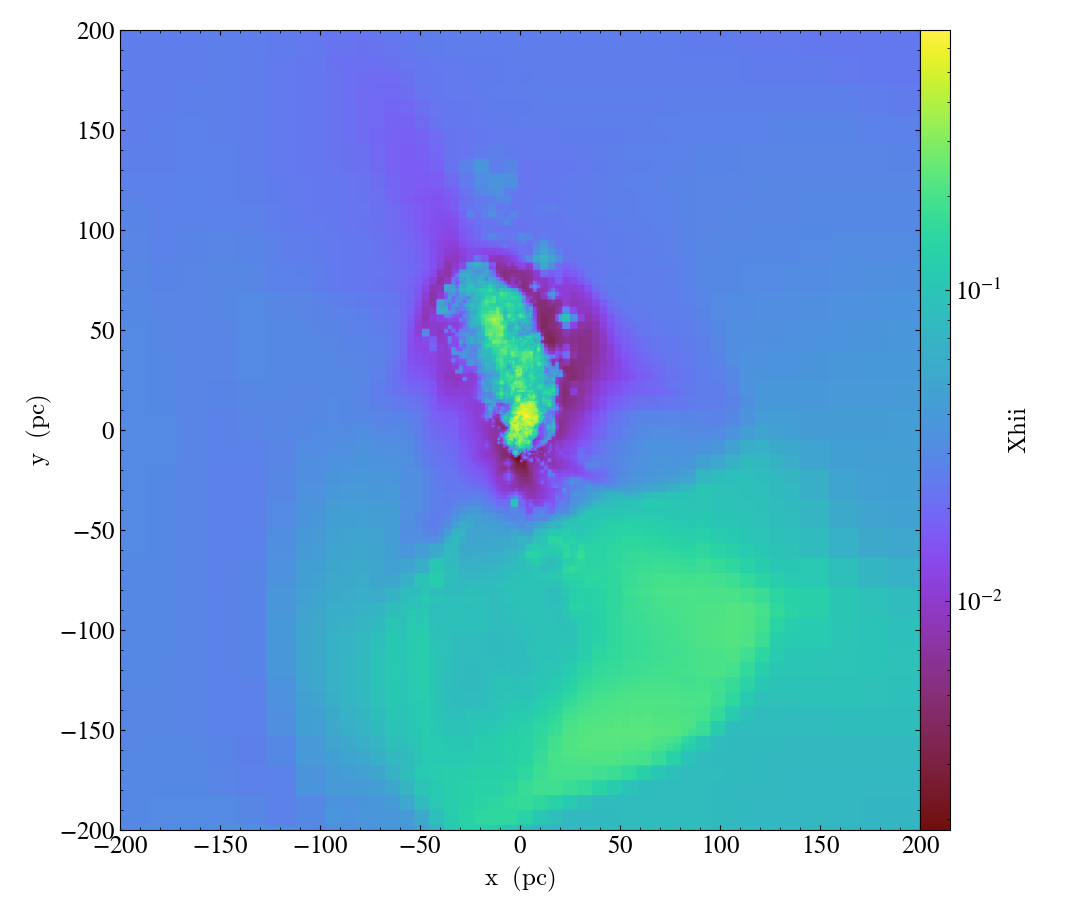

In [41]:
yt.ProjectionPlot(
    ds,
    "z",
    ("ramses", "xHII"),
    width = (plt_wdth, "pc"),
    weight_field = ("gas", "number_density"),
    center = ctr_at_code
)

yt : [INFO     ] 2024-10-01 20:16:54,767 Projection completed
yt : [INFO     ] 2024-10-01 20:16:54,767 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:16:54,767 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:16:54,768 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:16:54,769 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:16:54,769 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800



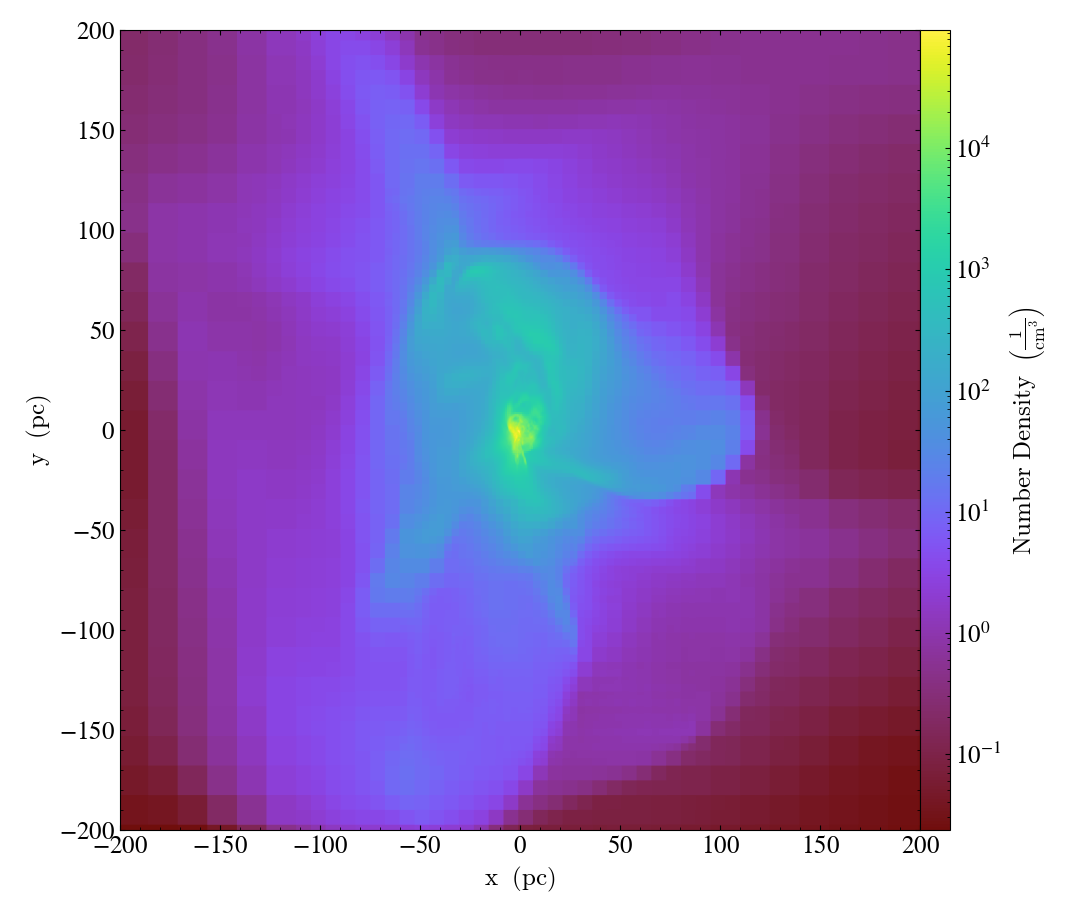

In [39]:
yt.ProjectionPlot(ds, 
                  "z", 
                  ("gas", "number_density"), 
                  width = (plt_wdth, "pc"),
                  weight_field = ("gas", "number_density"),
                  center = ctr_at_code
)

yt : [INFO     ] 2024-10-01 20:18:01,861 Projection completed
yt : [INFO     ] 2024-10-01 20:18:01,861 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:18:01,861 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:18:01,862 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:18:01,863 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:18:01,863 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



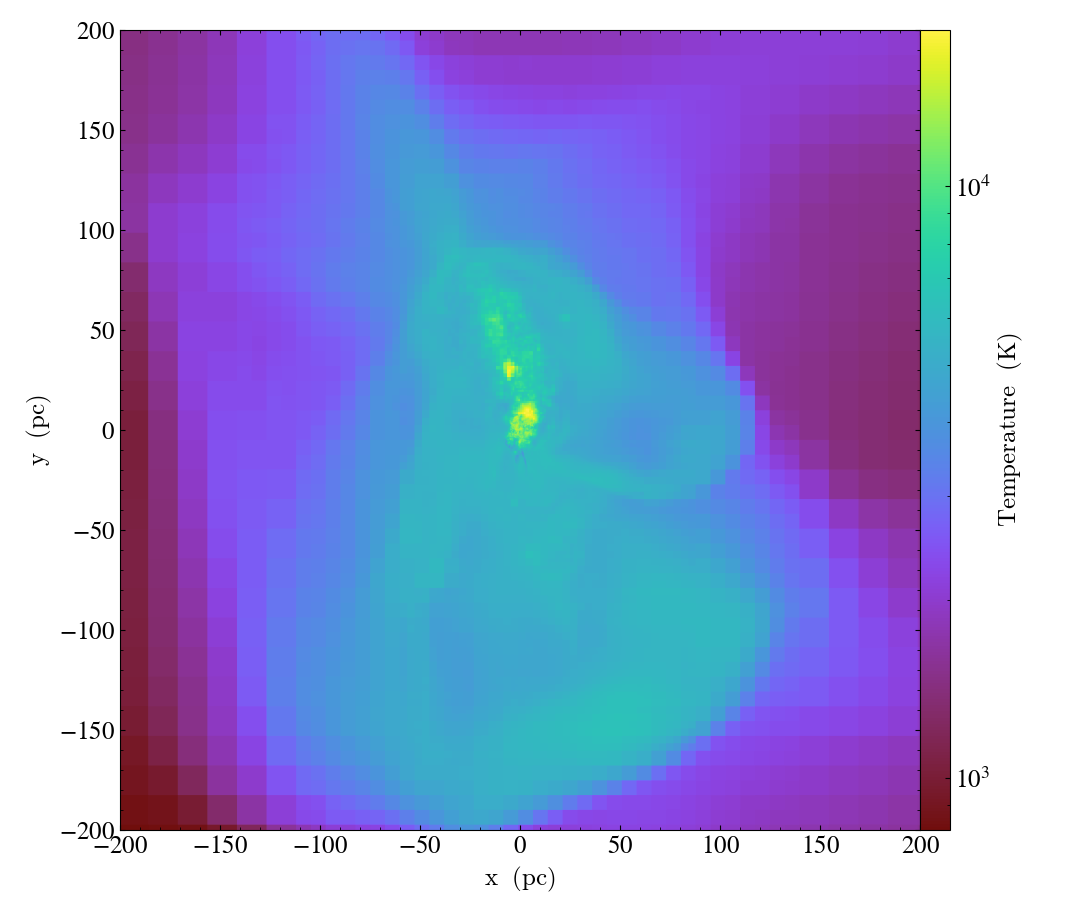

In [45]:
yt.ProjectionPlot(ds, 
                  "z", 
                  ("gas", "temperature"), 
                  width = (plt_wdth, "pc"),
                  weight_field = ("gas", "number_density"),
                  center = ctr_at_code
)

yt : [INFO     ] 2024-10-01 20:18:37,089 Projection completed
yt : [INFO     ] 2024-10-01 20:18:37,090 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:18:37,090 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:18:37,091 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:18:37,091 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:18:37,092 Making a fixed resolution buffer of (('ramses', 'Metallicity')) 800 by 800



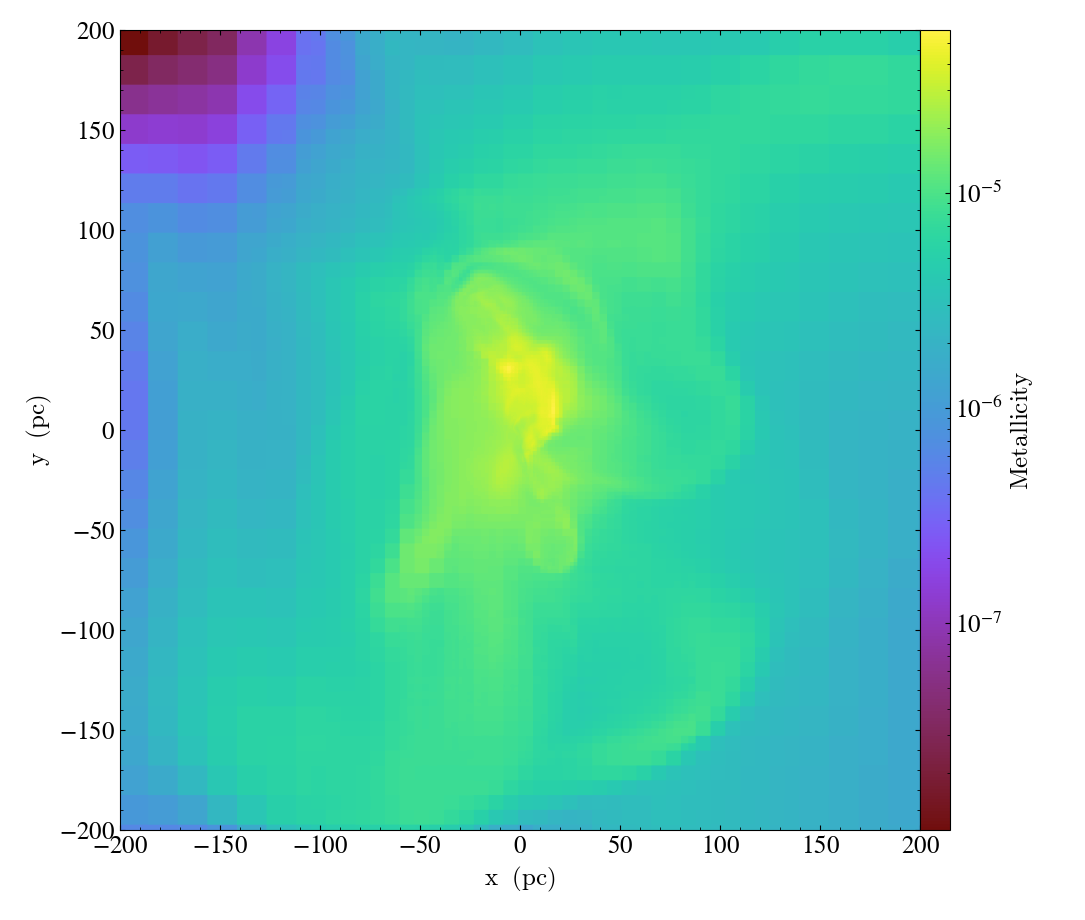

In [48]:
yt.ProjectionPlot(ds, 
                  "z", 
                  ("ramses", "Metallicity"), 
                  width = (plt_wdth, "pc"),
                  weight_field = ("gas", "number_density"),
                  center = ctr_at_code
)

yt : [INFO     ] 2024-10-01 20:19:10,096 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:19:10,097 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:19:10,098 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:19:10,098 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:19:10,098 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800



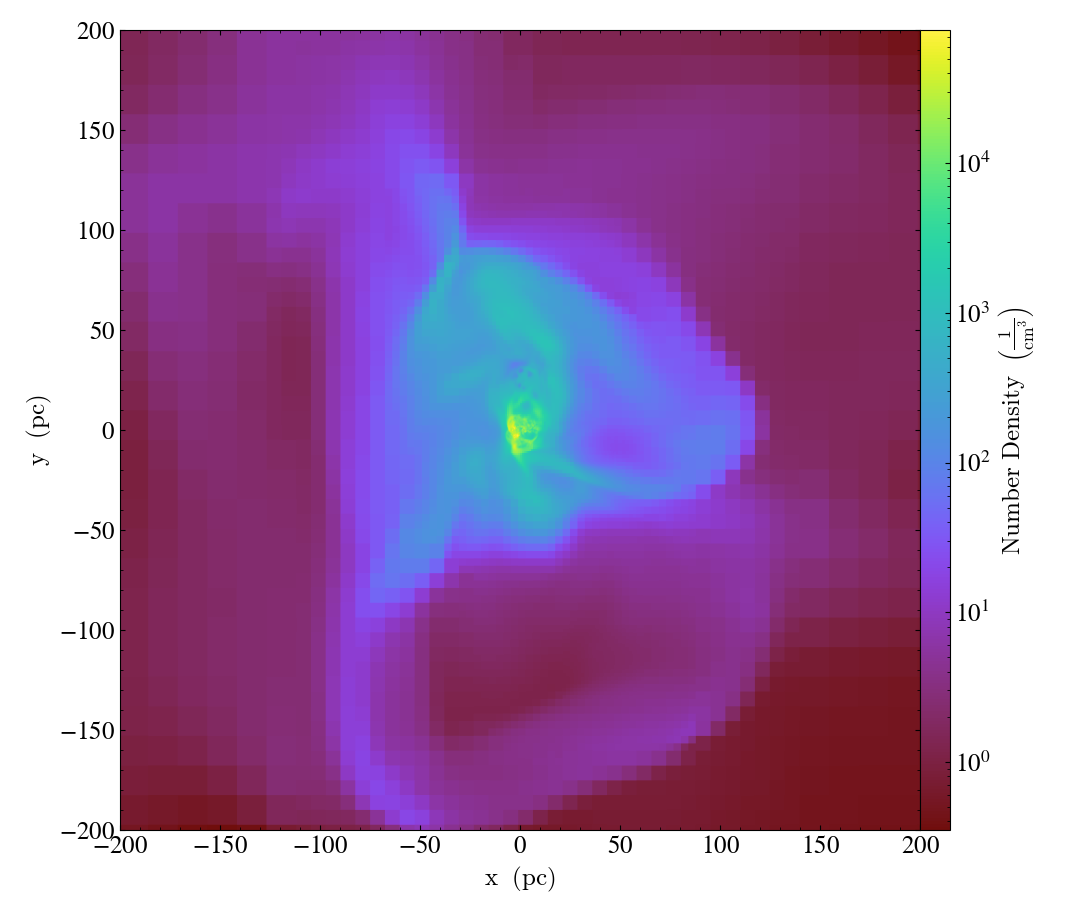

In [52]:
yt.SlicePlot(ds, 
            "z", 
            ("gas", "number_density"), 
            width = (plt_wdth, "pc"),
            center = ctr_at_code
)

yt : [INFO     ] 2024-10-01 20:49:24,142 Projection completed
yt : [INFO     ] 2024-10-01 20:49:24,143 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:49:24,143 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:49:24,144 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-01 20:49:24,144 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-01 20:49:24,145 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800


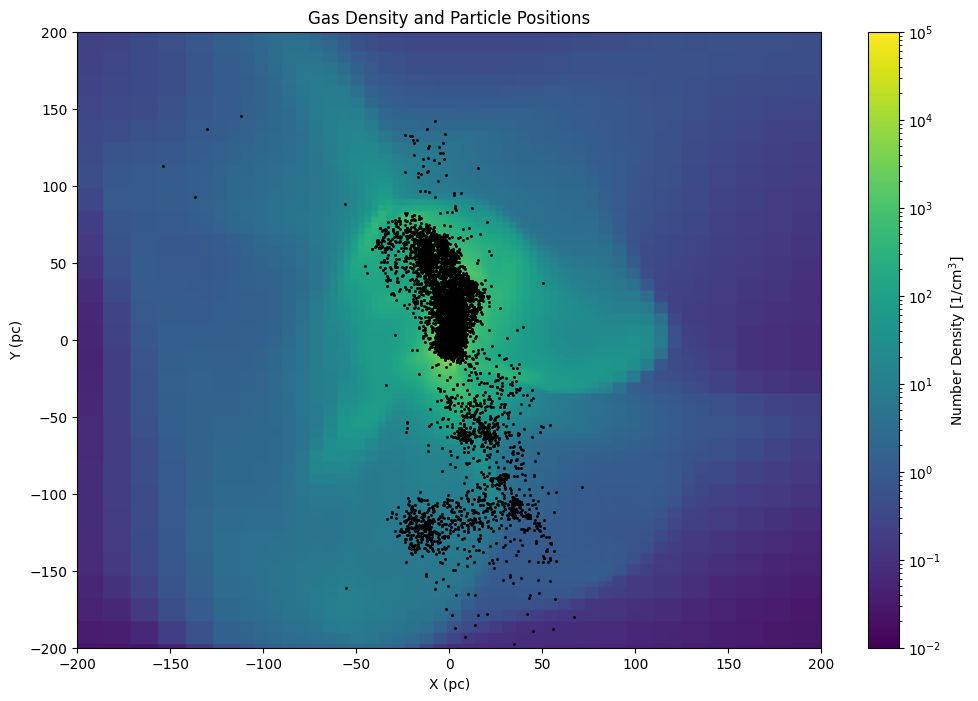

In [125]:
# Create a ProjectionPlot
p = yt.ProjectionPlot(ds, 
                     "z", 
                     ("gas", "number_density"), 
                     width = (plt_wdth, "pc"),
                     weight_field = ("gas", "number_density"),
                     center = ctr_at_code
)
p_frb = p.frb  # Fixed-Resolution Buffer from the projection
p_img = np.array(p_frb["gas", "number_density"])
star_bins = 2000
star_mass = np.ones_like(x_pos) * 10
pop2_xyz = np.array(ds.arr(np.vstack([x_pos, y_pos, z_pos]), "code_length").to("pc")).T
extent_dens = [-plt_wdth/2, plt_wdth/2, -plt_wdth/2, plt_wdth/2]
dens_norm = LogNorm(1e-2, 1e5)
plt.figure(figsize = (12,8))
plt.imshow(p_img, norm = dens_norm, extent = extent_dens, origin = 'lower', aspect = 'auto')
plt.colorbar(label = r"Number Density [1/cm$^3$]")
plt.scatter(pop2_xyz[:, 0], pop2_xyz[:, 1], s = 5, marker = '.', color = 'black')
plt.xlabel("X (pc)")
plt.ylabel("Y (pc)")
plt.title("Gas Density and Particle Positions")
plt.xlim(-plt_wdth/2, plt_wdth/2)
plt.ylim(-plt_wdth/2, plt_wdth/2)
plt.show()

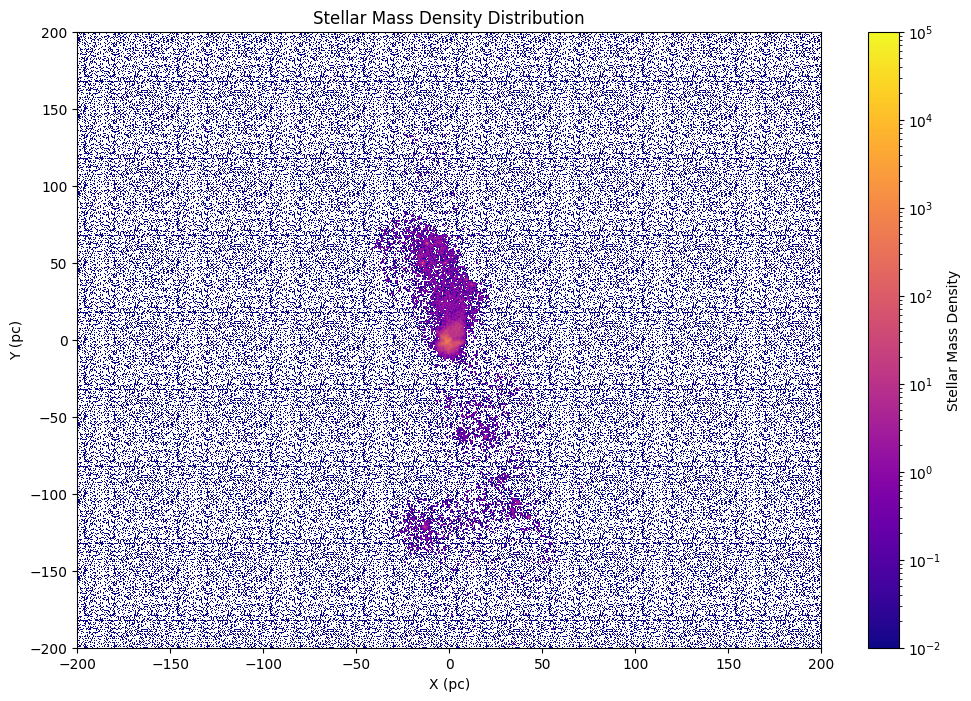

In [123]:
stellar_mass_dens, _, _ = np.histogram2d(pop2_xyz[:, 0],
                                         pop2_xyz[:, 1],
                                         bins = star_bins,
                                         weights = star_mass,
                                         range = [[-plt_wdth / 2, plt_wdth / 2],
                                                  [-plt_wdth / 2, plt_wdth / 2],
                                                 ],
)
stellar_mass_dens = stellar_mass_dens.T

plt.figure(figsize=(12, 8))
plt.imshow(stellar_mass_dens, norm = dens_norm, extent = extent_dens, origin = 'lower', aspect = 'auto', cmap = 'plasma')
plt.colorbar(label = "Stellar Mass Density")
plt.xlabel("X (pc)")
plt.ylabel("Y (pc)")
plt.title("Stellar Mass Density Distribution")
plt.show()

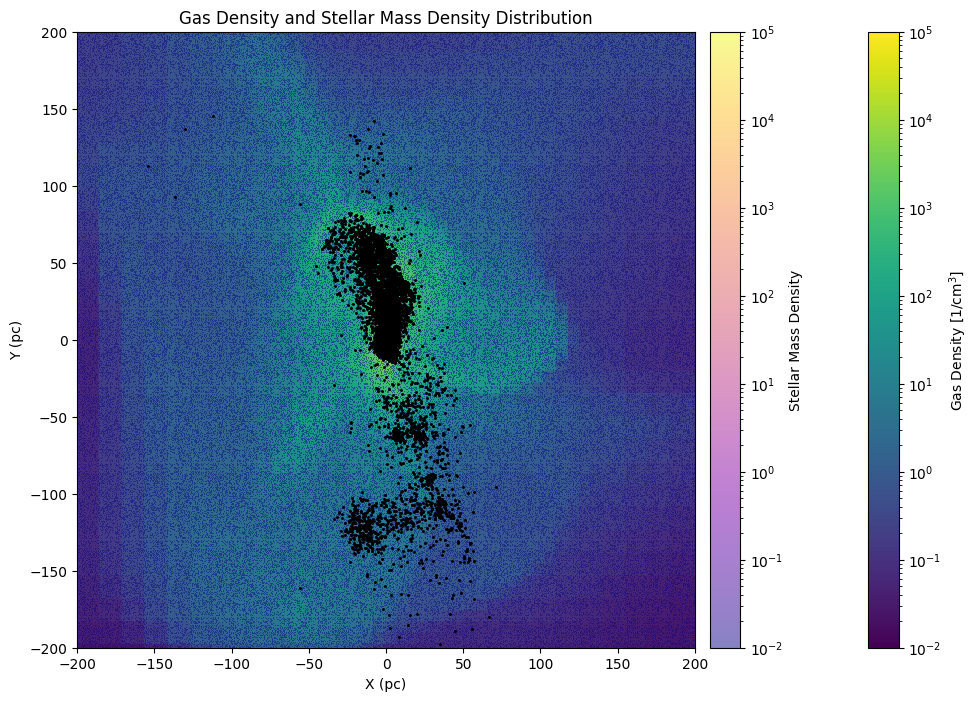

In [121]:
fig, ax = plt.subplots(figsize = (12, 8))
img1 = ax.imshow(p_img, norm = dens_norm, extent = extent_dens, origin = 'lower', aspect = 'auto', cmap = 'viridis')
cbar1 = fig.colorbar(img1, ax = ax, orientation = 'vertical')
cbar1.set_label(r"Gas Density [1/cm$^3$]")
img2 = ax.imshow(stellar_mass_dens, norm = dens_norm, extent = extent_dens, origin = 'lower', aspect = 'auto', cmap = 'plasma', alpha = 0.5)
cbar2 = fig.colorbar(img2, ax = ax, orientation = 'vertical', pad = 0.02)
cbar2.set_label("Stellar Mass Density")
# ax.scatter(pop2_xyz[:, 0], pop2_xyz[:, 1], s=5, marker='.', color='black')
ax.set_xlabel("X (pc)")
ax.set_ylabel("Y (pc)")
ax.set_title("Gas Density and Stellar Mass Density Distribution")
ax.set_xlim(-plt_wdth / 2, plt_wdth / 2)
ax.set_ylim(-plt_wdth / 2, plt_wdth / 2)
plt.show()